In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
outputpath = ".//data//output//"
df_2013 = pd.read_csv(outputpath + 'Cleaned2013.csv')
df_2014 = pd.read_csv(outputpath + 'Cleaned2014.csv')
df_2015 = pd.read_csv(outputpath + 'Cleaned2015.csv')
df_2016 = pd.read_csv(outputpath + 'Cleaned2016.csv')
df_2017 = pd.read_csv(outputpath + 'Cleaned2017.csv')
df_2018 = pd.read_csv(outputpath + 'Cleaned2018.csv', encoding='ISO-8859-1')
df_2019 = pd.read_csv(outputpath + 'Cleaned2019.csv')
df_2020 = pd.read_csv(outputpath + 'Cleaned2020.csv')
df_2021 = pd.read_csv(outputpath + 'Cleaned2021.csv')
df_2022 = pd.read_csv(outputpath + 'Cleaned2022.csv')
df_2023 = pd.read_csv(outputpath + 'Cleaned2023.csv')

# Cleaning and making the csv for all files

In [3]:
df_2013.rename(columns={'Department Name': 'Department'}, inplace=True)
df_2014.rename(columns={'Department Name': 'Department'}, inplace=True)

In [4]:
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7404 entries, 0 to 7403
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   NAME                               7404 non-null   object 
 1   Department                         7404 non-null   object 
 2   Job Title                          7404 non-null   object 
 3   Total Cash Compensation            7404 non-null   float64
 4   Base Pay                           7280 non-null   float64
 5   Overtime                           4060 non-null   float64
 6   Sick and Vacation Payouts          498 non-null    float64
 7   Other Cash Compensation            5731 non-null   float64
 8   Deferred Comp Paid by Employer     2245 non-null   float64
 9   Medical Dental Vision City Paid    5450 non-null   float64
 10  Employer's Share Pension Payments  5202 non-null   float64
 11  Retired?                           7404 non-null   objec

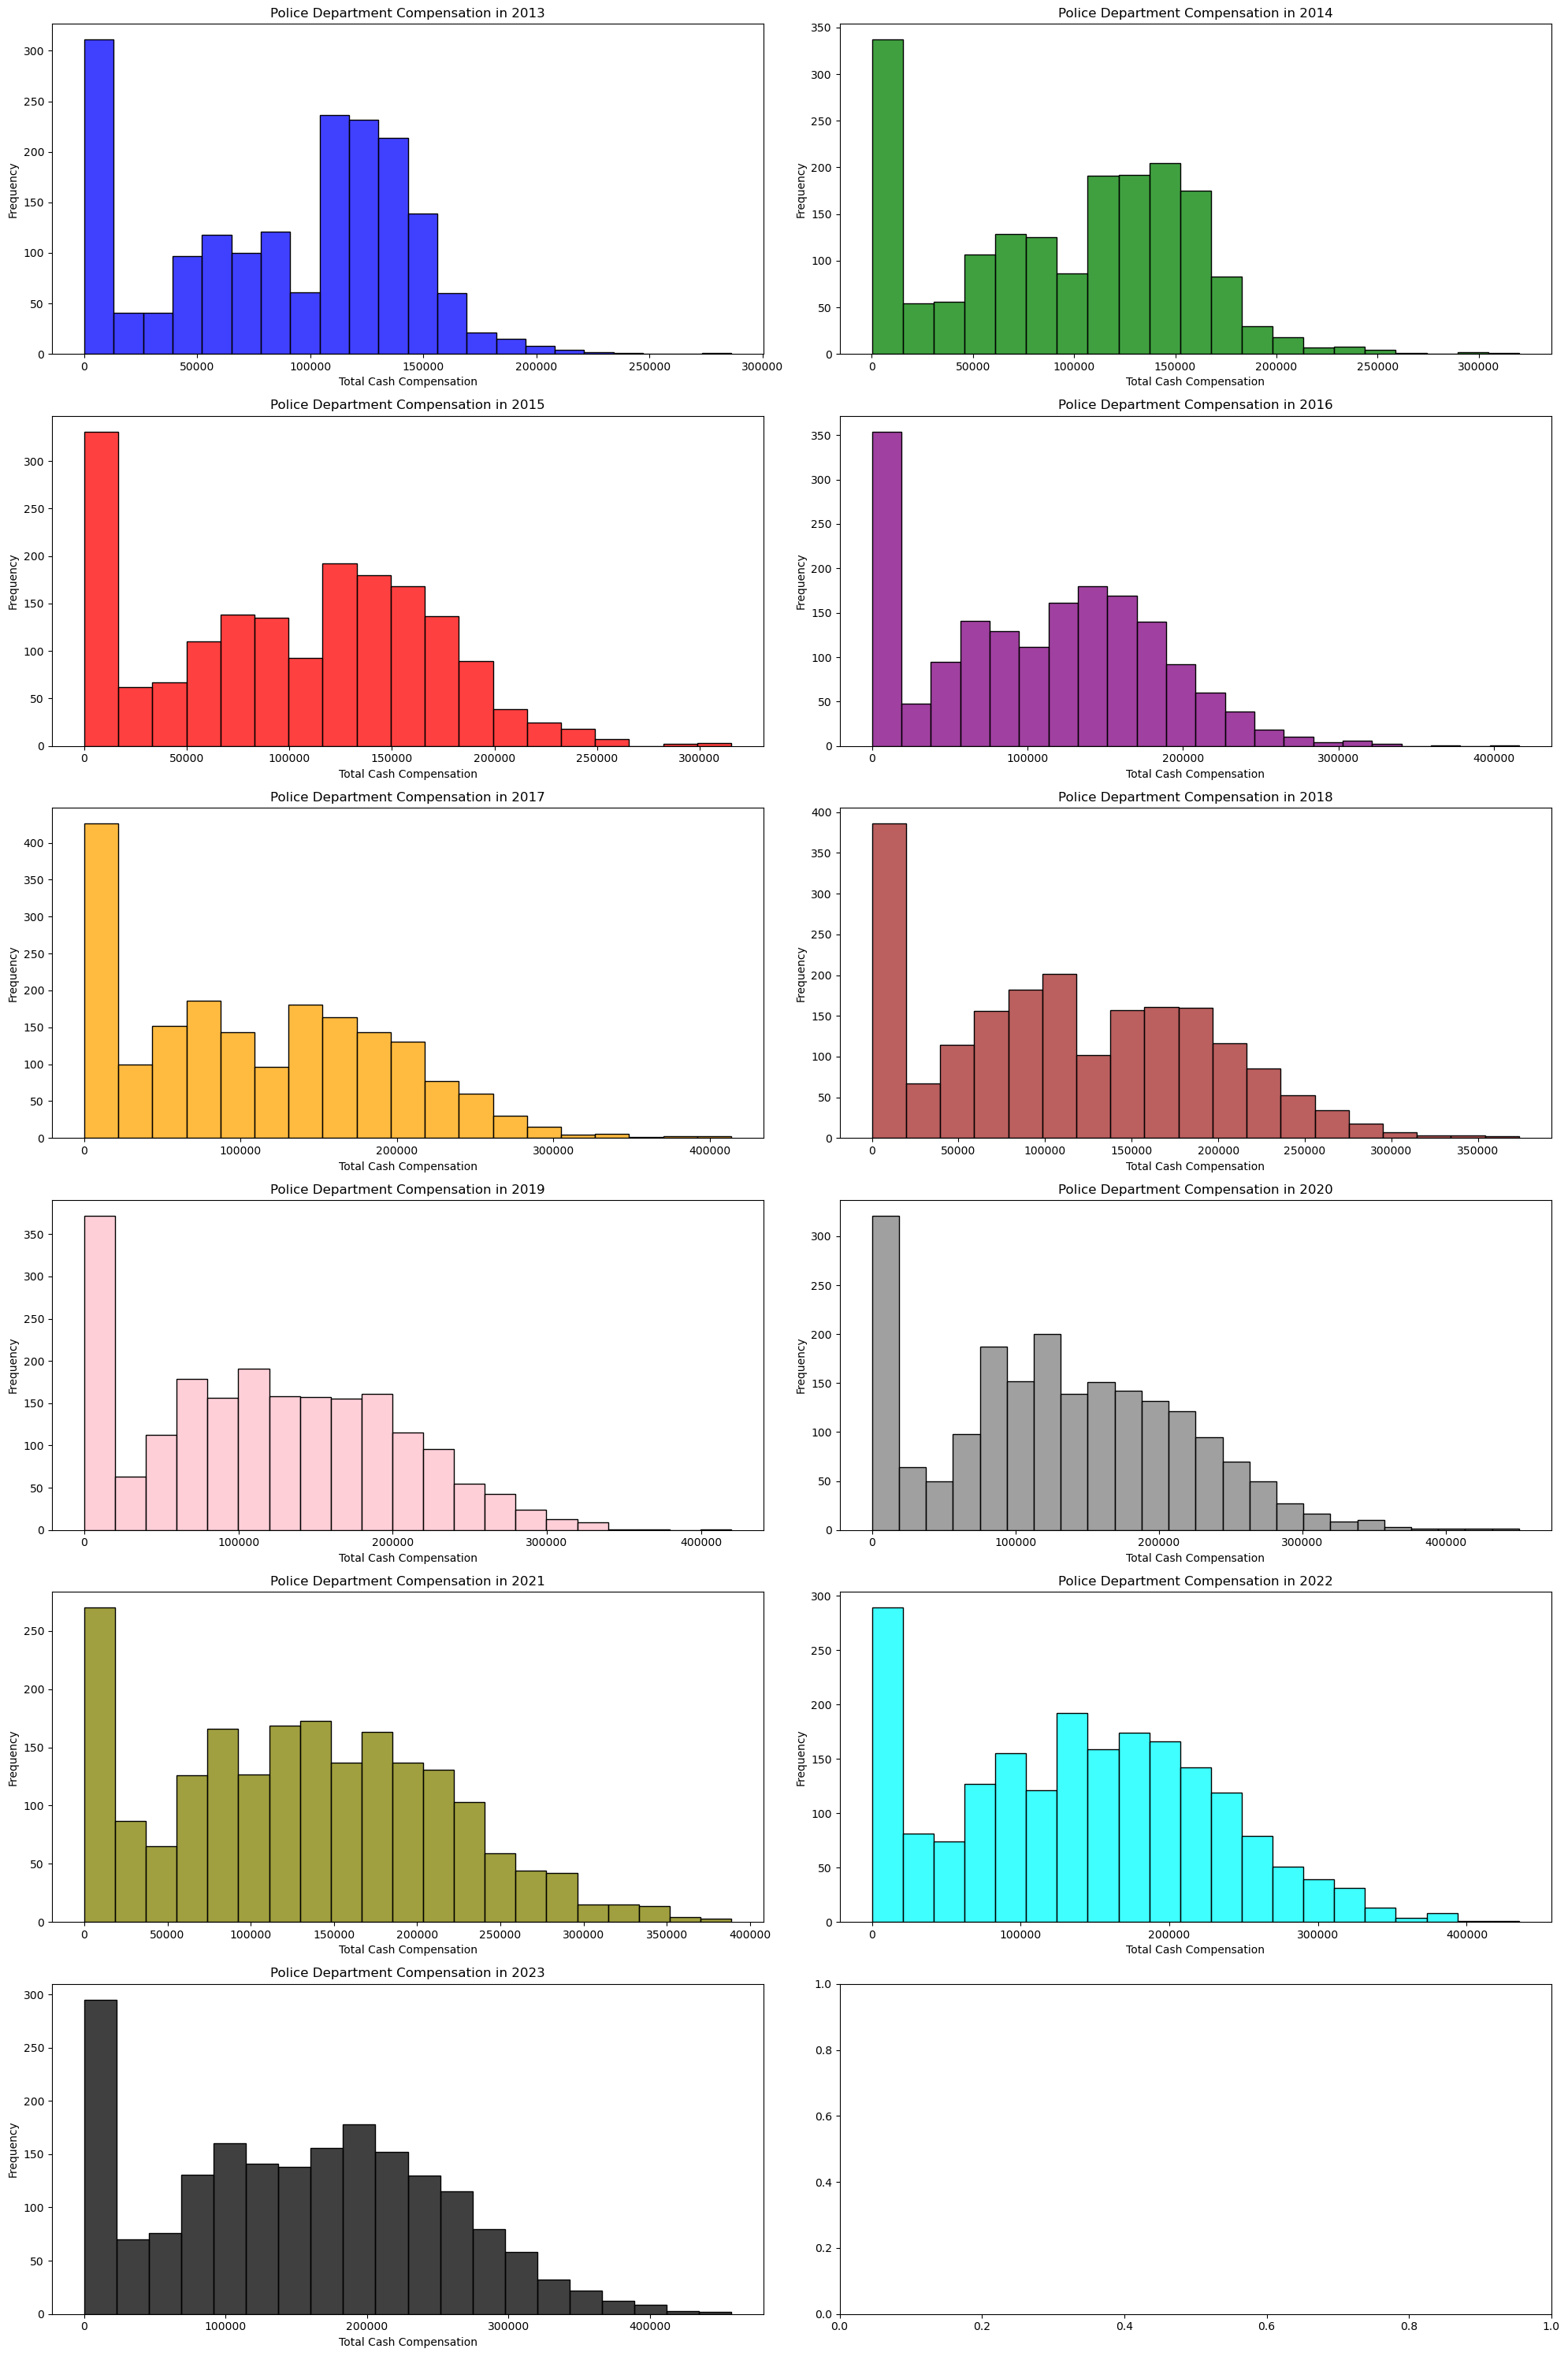

In [5]:
dfs = [df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'black']


fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 30))
axes = axes.ravel() 

for i, df in enumerate(dfs):
    police_df = df[df['Department'].str.contains('Police', case=False, na=False)]
    
    sns.histplot(police_df['Total Cash Compensation'], ax=axes[i], kde=False, color=colors[i % len(colors)])
    axes[i].set_title(f'Police Department Compensation in {2013+i}')
    axes[i].set_xlabel('Total Cash Compensation')
    axes[i].set_ylabel('Frequency')


# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
dfs = [df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for df, year in zip(dfs, years):
    df.insert(0, 'Year', year)

In [7]:
for year, df in zip(years, dfs):
    if year >= 2018:
        if '_id' in df.columns:
            df.drop('_id', axis=1, inplace=True)  # Drop the '_id' column in-place
            print(f"Dropped '_id' from {year}")
        else:
            print(f"No '_id' column to drop in {year}")

No '_id' column to drop in 2018
Dropped '_id' from 2019
Dropped '_id' from 2020
Dropped '_id' from 2021
Dropped '_id' from 2022
Dropped '_id' from 2023


In [8]:
for year, df in zip(years, dfs):
    if year > 2013:
        # Renaming the 4th column (index 3) to 'Job Title'
        df.rename(columns={df.columns[3]: 'Job Title'}, inplace=True)
        print(f"Renamed the 4th column to 'Job Title' for {year}")

Renamed the 4th column to 'Job Title' for 2014
Renamed the 4th column to 'Job Title' for 2015
Renamed the 4th column to 'Job Title' for 2016
Renamed the 4th column to 'Job Title' for 2017
Renamed the 4th column to 'Job Title' for 2018
Renamed the 4th column to 'Job Title' for 2019
Renamed the 4th column to 'Job Title' for 2020
Renamed the 4th column to 'Job Title' for 2021
Renamed the 4th column to 'Job Title' for 2022
Renamed the 4th column to 'Job Title' for 2023


In [9]:
for year, df in zip(years, dfs):
    if year == 2013 or year == 2014:
        if "Medical Dental Vision City Paid" in df.columns:
            df.rename(columns={"Medical Dental Vision City Paid": "Medical Dental Vision"}, inplace=True)
            print(f"Renamed 'Medical Dental Vision City Paid' to 'Medical Dental Vision' for {year}")
        else:
            print(f"'Medical Dental Vision City Paid' column not found in {year}")

Renamed 'Medical Dental Vision City Paid' to 'Medical Dental Vision' for 2013
Renamed 'Medical Dental Vision City Paid' to 'Medical Dental Vision' for 2014


In [10]:
for year, df in zip(years, dfs):
    if year == 2015 or year == 2016:
        if "Retirement Contributions - City Paid*" in df.columns:
            df.rename(columns={"Retirement Contributions - City Paid*": "Retirement Contributions (Normal Cost) - City Paid*"}, inplace=True)
            print(f"Renamed 'Retirement Contributions - City Paid*' to 'Retirement Contributions (Normal Cost) - City Paid*' for {year}")
        else:
            print(f"'Retirement Contributions - City Paid*' column not found in {year}")

Renamed 'Retirement Contributions - City Paid*' to 'Retirement Contributions (Normal Cost) - City Paid*' for 2015
Renamed 'Retirement Contributions - City Paid*' to 'Retirement Contributions (Normal Cost) - City Paid*' for 2016


In [11]:
for year, df in zip(years, dfs):
    if 2015 <= year <= 2018:
        # Check if the specific column name exists and then rename it
        column_name = "Retirement Contributions (Normal Cost) - City Paid*"
        new_column_name = column_name.rstrip('*')  # This removes the asterisk from the end of the string
        if column_name in df.columns:
            df.rename(columns={column_name: new_column_name}, inplace=True)
            print(f"Renamed '{column_name}' to '{new_column_name}' for {year}")
        else:
            print(f"'{column_name}' column not found in {year}")

Renamed 'Retirement Contributions (Normal Cost) - City Paid*' to 'Retirement Contributions (Normal Cost) - City Paid' for 2015
Renamed 'Retirement Contributions (Normal Cost) - City Paid*' to 'Retirement Contributions (Normal Cost) - City Paid' for 2016
Renamed 'Retirement Contributions (Normal Cost) - City Paid*' to 'Retirement Contributions (Normal Cost) - City Paid' for 2017
Renamed 'Retirement Contributions (Normal Cost) - City Paid*' to 'Retirement Contributions (Normal Cost) - City Paid' for 2018


In [12]:
df_2013.rename(columns={'NAME': 'Name'}, inplace=True)

In [13]:
df_2013.drop('Retired?', axis=1, inplace=True)

In [14]:
for year, df in zip(years, dfs):
    if year == 2013 or year == 2014:
        # Insert the new column at the 10th position (index 9) with null values
        df.insert(9, "Defined Contribution Plan Contributions - City Paid", None)
        print(f"Added 'Defined Contribution Plan Contributions - City Paid' column for {year}")


Added 'Defined Contribution Plan Contributions - City Paid' column for 2013
Added 'Defined Contribution Plan Contributions - City Paid' column for 2014


In [15]:
# Loop through each dataframe for 2013 and 2014 and remove the specified column
for year, df in zip(years, dfs):
    if year == 2013 or year == 2014:
        # Check if the column exists before attempting to drop it
        if "Deferred Comp Paid by Employer" in df.columns:
            df.drop("Deferred Comp Paid by Employer", axis=1, inplace=True)
            print(f"Removed 'Deferred Comp Paid by Employer' column for {year}")
        else:
            print(f"'Deferred Comp Paid by Employer' column not found in {year}")


Removed 'Deferred Comp Paid by Employer' column for 2013
Removed 'Deferred Comp Paid by Employer' column for 2014


In [16]:
for year, df in zip(years, dfs):
    if year == 2013 or year == 2014:
        # Check if the original column name exists before renaming
        old_column_name = "Employer's Share Pension Payments"
        new_column_name = "Retirement Contributions (Normal Cost) - City Paid"
        if old_column_name in df.columns:
            df.rename(columns={old_column_name: new_column_name}, inplace=True)
            print(f"Renamed '{old_column_name}' to '{new_column_name}' for {year}")
        else:
            print(f"'{old_column_name}' column not found in {year}")

Renamed 'Employer's Share Pension Payments' to 'Retirement Contributions (Normal Cost) - City Paid' for 2013
Renamed 'Employer's Share Pension Payments' to 'Retirement Contributions (Normal Cost) - City Paid' for 2014


In [17]:
# Loop through the dataframe for 2013 and add the new columns
for year, df in zip(years, dfs):
    if year == 2013:
        # Add new columns with all values as NaN
        df['Long Term Disability, Life, Medicare'] = None
        df['Misc Employment Related Costs'] = None
        print(f"Added 'Long Term Disability, Life, Medicare' and 'Misc Employment Related Costs' columns with NaN values for {year}")


Added 'Long Term Disability, Life, Medicare' and 'Misc Employment Related Costs' columns with NaN values for 2013


In [18]:
for year, df in zip(years, dfs):
    print(f"Column names for {year}: {df.columns.tolist()}")

Column names for 2013: ['Year', 'Name', 'Department', 'Job Title', 'Total Cash Compensation', 'Base Pay', 'Overtime', 'Sick and Vacation Payouts', 'Other Cash Compensation', 'Defined Contribution Plan Contributions - City Paid', 'Medical Dental Vision', 'Retirement Contributions (Normal Cost) - City Paid', 'Long Term Disability, Life, Medicare', 'Misc Employment Related Costs']
Column names for 2014: ['Year', 'Name', 'Department', 'Job Title', 'Total Cash Compensation', 'Base Pay', 'Overtime', 'Sick and Vacation Payouts', 'Other Cash Compensation', 'Defined Contribution Plan Contributions - City Paid', 'Medical Dental Vision', 'Retirement Contributions (Normal Cost) - City Paid', 'Long Term Disability, Life, Medicare', 'Misc Employment Related Costs']
Column names for 2015: ['Year', 'Name', 'Department', 'Job Title', 'Total Cash Compensation', 'Base Pay', 'Overtime', 'Sick and Vacation Payouts', 'Other Cash Compensation', 'Defined Contribution Plan Contributions - City Paid', 'Medical 

In [19]:
combined_df = pd.concat(dfs, ignore_index=True)

output_csv_path = 'df_all_years_clean.csv'

combined_df.to_csv(output_csv_path, index=False)

print(f"Data successfully combined and saved to {output_csv_path}")

/var/folders/fd/3bl_2gw53px8fzkn9hzfjt8c0000gn/T/ipykernel_39870/495682791.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dfs, ignore_index=True)


Data successfully combined and saved to df_all_years_clean.csv


In [20]:
df_all = pd.read_csv("df_all_years_clean.csv")
df_all

,Year,Name,Department,Job Title,Total Cash Compensation,Base Pay,Overtime,Sick and Vacation Payouts,Other Cash Compensation,Defined Contribution Plan Contributions - City Paid,Medical Dental Vision,Retirement Contributions (Normal Cost) - City Paid,"Long Term Disability, Life, Medicare",Misc Employment Related Costs
0,2013,"Bustillos,Steven D",Police,Police Sergeant,286137.69,90888.00,89867.88,97969.79,7412.02,NaN,13640.50,74429.71,NaN,NaN
1,2013,"Figone,Debra J",City Manager,City Manager U,248564.84,227975.02,NaN,NaN,20589.82,NaN,15166.00,131032.44,NaN,NaN
2,2013,"Guerra,Daniel P",Police,Police Officer,241039.12,97198.40,132104.54,NaN,11736.18,NaN,15371.56,79821.51,NaN,NaN
3,2013,"Moore,Christopher M",Police,Chief Of Police U,233540.32,15319.54,NaN,215470.80,2749.98,NaN,1371.81,11204.16,NaN,NaN
4,2013,"Vasquez,Hector M",Police,Police Officer,230469.85,97198.40,124552.69,NaN,8718.76,NaN,16345.32,79821.51,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89062,2023,Sammy Aguirre,Environmental Services,Water Systems Operator I,12.52,NaN,NaN,12.52,NaN,NaN,NaN,NaN,0.18,NaN
89063,2023,Jazmin Delgado,Public Works,Animal Care Attendant I PT,7.80,NaN,NaN,7.80,NaN,NaN,NaN,NaN,0.11,NaN
89064,2023,Marissa Boyd,Parks/Rec & Neigh Serv P R N S,Recreation Leader PT,6.61,6.61,NaN,NaN,NaN,0.25,NaN,NaN,0.10,NaN
89065,2023,Adriana Imbre,Environmental Services,Assoc Environ Serv Spec,2.77,NaN,NaN,2.77,NaN,NaN,NaN,NaN,0.04,NaN


In [21]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89067 entries, 0 to 89066
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Year                                                 89067 non-null  int64  
 1   Name                                                 89067 non-null  object 
 2   Department                                           89067 non-null  object 
 3   Job Title                                            89067 non-null  object 
 4   Total Cash Compensation                              89067 non-null  float64
 5   Base Pay                                             88223 non-null  float64
 6   Overtime                                             48488 non-null  float64
 7   Sick and Vacation Payouts                            9091 non-null   float64
 8   Other Cash Compensation                              66327 non-nul